In [17]:
import importlib
from pokemino_generator import *
importlib.reload(pokemino_generator)

<module 'pokemino_generator' from '/Users/anna/OneDrive - Nexus365/RFI/Code/3DTetrisGen/pokemino_generator.py'>

In [16]:
Brick([1,1], 1)

Brick([1, 1])

## Demo

In [3]:
# Pokemino2D with 7 blocks fitted centrally
exp2D = Volume((20, 20))
heptamino = Pokemino2D(10, 7, exp2D, positioning = (10, 9))
exp2D.fit_pokemino(heptamino)
exp2D.display_in_napari()

In [26]:
# 3 different Pokemino2D
exp2D = Volume((20, 20))

heptamino = Pokemino2D(10, 7, exp2D, positioning = (10, 9))
heksamino = Pokemino2D(9, 6, exp2D, positioning = (10, 10))
octamino = Pokemino2D(8, 8, exp2D, positioning = (9, 10))

for pokemino in exp2D.creatures:
    exp2D.fit_excluded_volume(pokemino)
for pokemino in exp2D.creatures:
    exp2D.fit_pokemino(pokemino)

print("Coordinates before overlap removal:", heptamino.positioning, heksamino.positioning, octamino.positioning, "\n")

exp2D.check_for_pairwise_overlap_and_fit(fit_excluded_volume=True)
 
print("\n Coordinates after overlap removal:", heptamino.positioning, heksamino.positioning, octamino.positioning)
   
exp2D.display_in_napari()

Coordinates before overlap removal: (10, 9) (10, 10) (9, 10) 

There's overlap between 1 2
Before moving apart: [10  9] [10 10]
After moving apart: [10  6] [10 10]
There's overlap between 2 3
Before moving apart: [10 10] [ 9 10]
After moving apart: [13 10] [ 9 10]

 Coordinates after overlap removal: (10, 6) (13, 10) (9, 10)


In [38]:
# 3 different Pokemino2D
exp2D = Volume((20, 20, 20))

heksamino1 = Pokemino3D(7, 50, exp2D, positioning = (9, 10, 8), density=1)
heksamino2 = Pokemino3D(8, 50, exp2D, positioning = (10, 9, 11), density=2)

"""for pokemino in exp2D.creatures:
    exp2D.fit_excluded_volume(pokemino)"""
for pokemino in exp2D.creatures:
    exp2D.fit_pokemino(pokemino)

exp2D.check_for_pairwise_overlap_and_fit(fit_excluded_volume=True)
   
exp2D.display_in_napari()

There's overlap between 1 2
Before moving apart: [ 9 10  8] [10  9 11]
After moving apart: [ 9 10  5] [10  9 11]


In [185]:
# 6 different Pokeminos3D (display using turbo colormap)
exp3D = Volume((20, 20, 20))

pok_1 = Pokemino3D(10, 7, exp3D, positioning = (10, 9, 5), density = 1)
pok_2 = Pokemino3D(11, 5, exp3D, positioning = (7, 10, 10), density = 1.5)
pok_3 = Pokemino3D(12, 9, exp3D, positioning = (8, 8, 8), density = 2)
pok_4 = Pokemino3D(13, 11, exp3D, positioning = (5, 5, 10), density = 2.5)
pok_5 = Pokemino3D(15, 15, exp3D, positioning = (2, 8, 7), density = 3)
pok_6 = Pokemino3D(14, 13, exp3D, positioning = (9, 5, 9), density = 3.5)

exp3D.check_for_pairwise_overlap_and_fit(fit_excluded_volume=True)
    
exp3D.display_in_napari()

There's overlap between 3 6
Before moving apart: [8 8 8] [9 5 9]
After moving apart: [7 9 8] [9 5 9]
There's overlap between 4 6
Before moving apart: [ 5  5 10] [9 5 9]
After moving apart: [ 5  5 11] [9 5 9]
There's overlap between 2 3
Before moving apart: [ 7 10 10] [7 9 8]
After moving apart: [ 7 10 12] [7 9 8]


In [13]:
exp3D_2 = Volume((20, 20, 20))
pokemino_to_rotate_1 = Pokemino3D (2, 15, exp3D_2, positioning = (5, 5, 5), density = 1)
pokemino_to_rotate_2 = Pokemino3D (2, 15, exp3D_2, positioning = (15, 15, 15), density = 1)
pokemino_to_rotate_3 = Pokemino3D (2, 15, exp3D_2, positioning = (10, 5, 15), density = 1)
pokemino_to_rotate_1.rotate_the_block_3_axes()
pokemino_to_rotate_2.rotate_the_block_3_axes()
pokemino_to_rotate_2.rotate_the_block_3_axes()
exp3D_2.check_for_pairwise_overlap_and_fit()
exp3D_2.display_in_napari()

In [10]:
seeds = [5, 6, 7, 8]

for seed in seeds:
    for theta_x in THETA_EACH_90:
        for theta_y in THETA_EACH_90:
            for theta_z in THETA_EACH_90:
                volume = Volume ((15, 20, 30))
                polyomino_to_rotate = Pokemino3D(seed, 15)
                polyomino_to_rotate.rotate_the_block_1_axis(axis=0, theta=theta_z)
                polyomino_to_rotate.rotate_the_block_1_axis(axis=1, theta=theta_x)
                polyomino_to_rotate.rotate_the_block_1_axis(axis=2, theta=theta_y)
                volume.fit_a_polyomino_central(polyomino_to_rotate)
                volume.save_as_mrcfile(Path(f'rotated_polyominos/{seed}_{theta_z}_{theta_x}_{theta_y}.mrc'))

In [18]:
seeds = [1, 2, 3, 4, 5, 6, 7]

max_size = 8 # max. expected length

test_image = Volume((max_size, max_size*len(seeds), max_size))

for i, seed in enumerate(seeds):
    polyomino = Pokemino3D(seed, 15, test_image, positioning = (int(max_size/2), int(max_size*(i+0.5)), int(max_size/2)))
    polyomino.rotate_the_block_3_axes()

test_image.check_for_pairwise_overlap_and_fit()
test_image.display_in_napari()


Generate a 3D net of regularly-spaced, randomly-generated, randomly-rotated pokeminos of identical size from a list of seeds

In [186]:
seeds = [1, 2, 3, 4, 5, 6, 7]
pokemino_size = 15

max_size = 8 # max. expected length

j, k, l = 1, 3, 3 # numbers of polyominos in each dimension

test_image = Volume((max_size * j, max_size * k, max_size * l))

for x in range (j):
    for y in range (k):
        for z in range (l):
            random.seed()
            # in the line below using random.choice(seeds) didn't return a random seed but e.g. 2, 5, 4, 1, 1, 1, 1, 1, 1 until the line random.seed()
            polyomino = Pokemino3D(random.choice(seeds), pokemino_size, test_image, positioning = (int(max_size*(x+0.5)), int(max_size*(y+0.5)), int(max_size*(z+0.5))))
            polyomino.rotate_the_block_3_axes()

test_image.check_for_pairwise_overlap_and_fit()
test_image.display_in_napari()

Generate a 3D volume of randomly-placed but non-overlapping randomly-rotated pokeminos of identical size from a list of seeds

In [157]:
(20 * 8**3)**(1/3)

21.71534093275925

In [197]:
seeds = [1, 2, 3, 4, 5, 6, 7]
pokemino_size = 15

n_pokeminos = 10
max_size = 6 # max. expected length
a_volume = int((n_pokeminos * max_size**3)**(1/3))
test_image = Volume ((a_volume, a_volume, a_volume))

for x in range (n_pokeminos):
    random.seed()
    # in the line below using random.choice(seeds) didn't return a random seed but e.g. 2, 5, 4, 1, 1, 1, 1, 1, 1 until the line random.seed()
    polyomino = Pokemino3D(random.choice(seeds), pokemino_size, test_image, positioning=(random.randint(0, test_image.shape[0]-1), random.randint(0, test_image.shape[1]-1), random.randint(0, test_image.shape[2]-1)), density = x)
    polyomino.rotate_the_block_3_axes()

test_image.check_for_pairwise_overlap_and_fit()
test_image.display_in_napari()
print(test_image.creatures)

There's overlap between 1 5
Before moving apart: [3 9 3] [2 9 0]
After moving apart: [3 9 4] [2 9 0]
There's overlap between 1 8
Before moving apart: [3 9 4] [2 8 1]
After moving apart: [4 9 5] [2 8 1]
There's overlap between 3 4
Before moving apart: [8 0 4] [11  1  4]
After moving apart: [6 0 4] [11  1  4]
There's overlap between 3 7
Before moving apart: [6 0 4] [5 1 6]
After moving apart: [ 6 -1  2] [5 1 6]
There's overlap between 5 8
Before moving apart: [2 9 0] [2 8 1]
After moving apart: [ 2 10  0] [2 8 1]
There's overlap between 8 10
Before moving apart: [2 8 1] [0 6 0]
After moving apart: [4 9 1] [0 6 0]
There's overlap between 1 8
Before moving apart: [4 9 5] [4 9 1]
After moving apart: [4 9 7] [4 9 1]
There's overlap between 1 9
Before moving apart: [4 9 7] [ 5  9 10]
After moving apart: [3 9 6] [ 5  9 10]
There's overlap between 5 8
Before moving apart: [ 2 10  0] [4 9 1]
After moving apart: [ 1 11 -1] [4 9 1]
There's overlap between 1 8
Before moving apart: [3 9 6] [4 9 1]
A

In [28]:
mrcfile.validate(Path('rotated_polyominos/1_0_0_0.mrc'))

FileNotFoundError: [Errno 2] No such file or directory: 'rotated_polyominos/1_0_0_0.mrc'

In [37]:
with mrcfile.open(Path('rotated_polyominos/5_0_0_0.mrc')) as mrc:
    viewer = napari.view_image(mrc.data)

## Create a 2D Polyomino and visualise all 90 degrees rotations

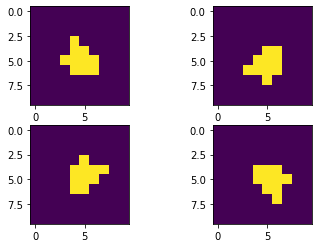

In [231]:
heptamino = Pokemino2D(4, 10)
fig = plt.figure()

for i in range(1, 5):
    rotation = THETA_EACH_90[i-1]
    ax = fig.add_subplot(2, 2, i)
    heptamino.rotate_the_block(rotation)
    heptamino.visualise_the_2d_block(10)

## Exploring mrcfile library & displaying mrc in napari

In [234]:
# Displaying a 2D mrcfile
with mrcfile.new('tmp2d.mrc', overwrite=True) as mrc:
    mrc.set_data(np.zeros((5, 5), dtype=np.int8))
    mrc.data[1:4,1:4] = 10
    mrc.data[2:3,2:3] = 30
    viewer = napari.view_image(mrc.data)
    

In [49]:
# Displaying a 3D mrcfile
with mrcfile.new('tmp3d.mrc', overwrite=True) as mrc:
    mrc.set_data(np.zeros((5, 5, 5), dtype=np.int8))
    mrc.data[1:4,1:4,1:4] = 10
    mrc.data[2:3,2:3,2:3] = 30
    viewer = napari.view_image(mrc.data)